In [17]:
# Lozano Garcia Eduardo Alejandro (Github: Ale9806)
# BMSIS Visiting Scholar,Washington D.C. ,IPN Biomedical Engeneering Mexico City 
# 10/29/2020

import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import cv2

In [18]:
### Basic operations ###
def imread(file):
    """ Reads image """
    path = 'images\\'            # Set path of images 
    img = cv2.imread(path+file)  # Read image with opencv
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return img                   

def imgray(img):
    """ Transforms RGB Image to grayscale image """
    ### weithing average of the 3 channels ###
    img_gray = (0.333*img[:,:,0] + 0.333*img[:,:,1] +  0.333*img[:,:,2]).astype(np.uint8)  
    return img_gray

def summary(img):
    tipo      = type(img)    # Get type
    size      = img.shape    # Get shape
    data_type = img.dtype    # Get the Data type
    ### Print summary of variable ###
    print(f"type: {tipo}, dtype: {data_type}, shape: {size}")

def imshow(img):
    try:                              # Try  
        img.shape(2)                  # This will only run if we enconunter a tensor of order 3 (n,m,c*)  therefore image is RGB             
        plt.imshow(img)               # Plot RGB image
    except:                           # Except
        gray  =  plt.get_cmap("gray")                   # Select gray cmap
        norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
        plt.imshow(img,cmap=gray,norm=norm )            # Show gray image (matrix) with cmpa 
        
    plt.axis('off')                   # Delete axis 
    plt.show()                        # Show image 
 




def imshow3(img1,img2,img3,title1,title2,title3):
    try:                              # Try  
        img1.shape(2)                  # This will only run if we enconunter a tensor of order 3 (n,m,c*)  therefore image is RGB             
        fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,17))
        ax[0].imshow(img1)               # Plot RGB image
        ax[1].imshow(img2)               # Plot RGB image
        ax[2].imshow(img3)               # Plot RGB image
        ax[0].axis('off')             # Delete axis 
        ax[1].axis('off')             # Delete axis 
        ax[2].axis('off')             # Delete axis 
       
    except:                           # Except
        gray  =  plt.get_cmap("gray")                   # Select gray cmap
        norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
        fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,17))
        ax[0].imshow(img1,cmap=gray,norm=norm)               # Show gray image (matrix) with cmpa
        ax[1].imshow(img2,cmap=gray,norm=norm)               # Show gray image (matrix) with cmpa
        ax[2].imshow(img3,cmap=gray,norm=norm)               # Show gray image (matrix) with cmpa
        ax[0].axis('off')             # Delete axis 
        ax[1].axis('off')             # Delete axis 
        ax[2].axis('off')             # Delete axis 
        
    ax[0].set_title(title1)             # Delete axis 
    ax[1].set_title(title2)             # Delete axis 
    ax[2].set_title(title3)             # Delete axis 
       
    
    plt.show()                        # Show image 
 

    

## Lectura de fotos

type: <class 'numpy.ndarray'>, dtype: uint8, shape: (355, 355)


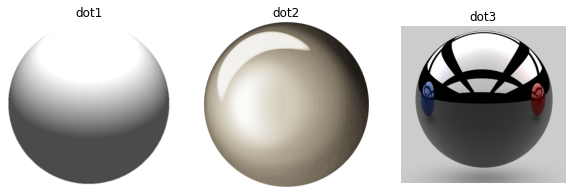

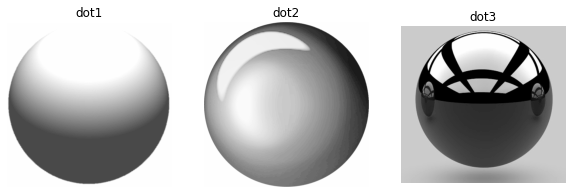

In [19]:
### TRY  FUNCTIONS ###
img1 =  imread("dot1.PNG")
img2 =  imread("dot2.PNG")
img3 =  imread("dot3.PNG")
img_gray1 = imgray(img1)
img_gray2 = imgray(img2)
img_gray3 = imgray(img3)
summary(img_gray1)
imshow3(img1,img2,img3,title1="dot1",title2="dot2",title3="dot3")
imshow3(img_gray1,img_gray2,img_gray3,title1="dot1",title2="dot2",title3="dot3")

In [20]:
def create_color_level(n):
    """ Calculates the stepping of values  for a gray image of n bits"""
    
    if isinstance(n, int):                          # Only run if varaible is an integer
        limit = 2**n -1                             # Calculate all states
        stepping =  255/limit                       # Calculate stepping
        values = []                                 # Initiate values (empty list)
        for i in range(0,limit + 1):                # Iterate over bits
            values.append(int(0 + i*stepping))      # Append current value 
            
        return values
    
    else: 
        print("Input should be an intiger")         # Print warning message if number is a float
        
        
        
def color_bar(n,length=10):
    """ Returns a color bar """
    levels = create_color_level(n)                  # Returns a list of levels 
    
    ### Plot color bar ###
    fig, ax = plt.subplots(figsize=(length, 0.7))   # Create a plot with specific size 
    fig.subplots_adjust(bottom=0.5)                 # Adjust plot

    gray  =  plt.get_cmap("gray")                   # Select gray cmap
    norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
    label = f"Color Bar: {n} bits"                  # Set label 
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=gray),cax=ax, orientation='horizontal', label=label,ticks=levels)
    
    plt.show()
    
def p_norm_1d(a,b):
    """ Returns the p norm of two points in 1-D dimension """
    norm = abs(a-b)        # p norm in 1 dimenssion
    return norm 

def reduction(img_gray, bits,length=4):
    """ Reduces the number of bits image will have, using k nearest neighbors"""
    centroids = create_color_level(bits) # Returns a list of levels (this will become or neighbors)
    k = len(centroids)                   # Get len of centroids                     
    n = img_gray.shape[0]                # Get number of rows
    m = img_gray.shape[1]                # Get number of columns
    M = np.zeros((n,m),dtype=np.uint8)   # Copy gray matrix's shape
    for ni in range(0,n):                # iterate over columns
        for mi in range(0,m):            # iterate over rows
            distance = np.zeros((k,1))   # Create a vector of zeros to store distances
            for ki in range(0,k):        # Iterate over centroids idx
                ### compute euclidan distance in 1d for point and centroids ###
                distance[ki] = p_norm_1d(img_gray[ni,mi],centroids[ki]).astype(np.uint8)

            idx =       np.argmin(distance) # Get the argument with less distance 
            M[ni,mi] =  centroids[idx]      # Assign the new matrix the centroid that fitts it the best 

    plt.figure(figsize=(10, 3.5))           # Create figure
    gray  =  plt.get_cmap("gray")           # Get gray cmap for image
    norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
    plt.title(f" {bits} Bits")              # Set title of image
    plt.imshow(M,cmap=gray,norm=norm)       # Show image
    plt.axis("off")                         # Get rid of axis
    color_bar(bits,length=length)                # Plot colorbar 
    

In [21]:
def show_mat(A):
    """Plots Matrix with numerical value"""
    
    ai = A.shape[0]  # Get Matrix Higth                                                
    aj = A.shape[1]  # Get Matrix Width
    gray  =  plt.get_cmap("gray")                       # Select gray cmap
    norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)      # Normalize from 0 to 255
    plt.matshow(A, norm=norm,cmap=gray )                # Plot Matrix
    plt.axis("off")                                     # Turn off axis
    ### Iiterate over the 
    for i in range(0,ai):     # Iterate over rows 
        for j in range(0,aj): # Iterate over Columns 
            c = A[i,j]        # Get current value
            ### Print value ###
            plt.text(j, i, str(c), va='center', ha='center') 
    
    

In [22]:

#n = img_gray1.shape[0]                     # Get number of columns
#m = img_gray2.shape[1]                     # Get number of rows

def calculate_batch(img_gray,n,steps = 10,verbose=False ):
    
    chunks  = n/steps                                    # Calcualte size of chunks
    if isinstance(chunks, float):                        # if size is a float number
        chunks = round(chunks)                           # Round it up
        grid  =  chunks*np.ones(steps,dtype=np.uint8)    # Create a vector with the chunks
        final_chunk = n - (steps-1)*chunks               # Calulate the left overs fot final chunk
        grid[steps-1] = final_chunk                      # Switch final chunk to  left over
        
        if verbose:                                                  # if verbose
            print(f"Equal chunks of: {chunks} with {steps-1} steps") # print amount of chunks
            print(f"final chunk size: {final_chunk}")                # Size of final chunk                            
            print(f"grid: {grid}")                                   # Print grid 
    
    else:                                               # Else (chuncksize is a int number)
        grid  =  chunks*np.ones(steps,dtype=np.uint8)   # Get grid
        if verbose:                                     # If verbose
            print(grid)                                 # Print grid 
        
    
    return grid 
        
def plot_grid(img_gray,grid_size):
    """ Plots a gray scale image with grids """
    n = img_gray.shape[0]                               # Get number of columns
    m = img_gray.shape[1]                               # Get number of rows
    xg = calculate_batch(img_gray,n,steps=grid_size)    # Get x grid vector
    yg = calculate_batch(img_gray,n,steps=grid_size)    # Get y grid vector 
    plt.imshow(img_gray,cmap="gray")                    # Plot image
    xg_total,yg_total = (0,0)                           # initalize grid counters
    for xgi,ygi in zip(xg,yg):                          # iterate over grids (this works since xg and yg are the same szie)
        xg_total += xgi                                 # increment x grid 
        yg_total += ygi                                 #increment  y grid
        plt.vlines(xg_total, ymin=0, ymax=m,colors='k') # Plot vertical lines 
        plt.hlines(yg_total, xmin=0, xmax=n,colors='k') # Plot horizontal lines

    plt.xlim(0,n)
    plt.ylim(n,0)
    plt.show()        

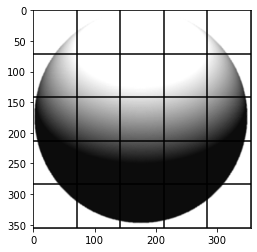

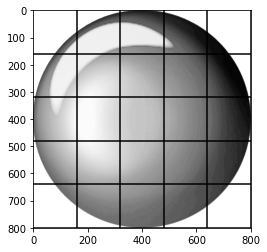

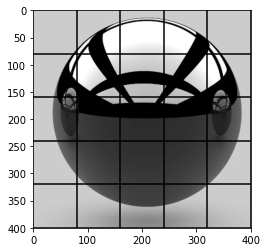

In [23]:
plot_grid(img_gray1,grid_size=5)
plot_grid(img_gray2,grid_size=5)
plot_grid(img_gray3,grid_size=5)

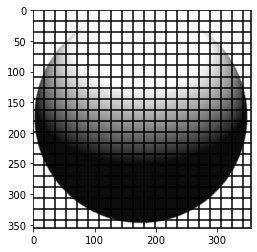

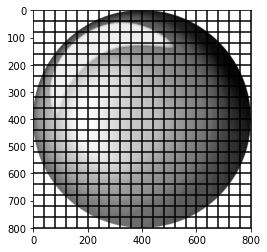

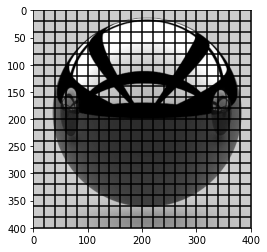

In [24]:
plot_grid(img_gray1,grid_size=20)
plot_grid(img_gray2,grid_size=20)
plot_grid(img_gray3,grid_size=20)

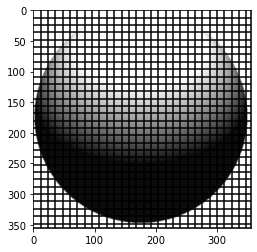

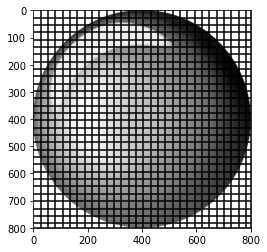

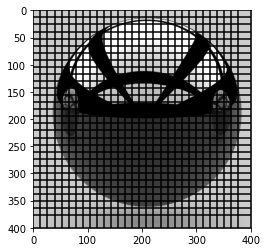

In [25]:
plot_grid(img_gray1,grid_size=30)
plot_grid(img_gray2,grid_size=30)
plot_grid(img_gray3,grid_size=30)

In [26]:
def pixelado(img_gray,grid_size=14,plot_values=True):
    n = img_gray.shape[0]                                   # Get number of columns
    m = img_gray.shape[1]                                   # Get number of rows
    xg = calculate_batch(img_gray,n,steps=grid_size)        # Get x grid vector
    yg = calculate_batch(img_gray,n,steps=grid_size)        # Get y grid vector 
    new_img_gray = np.zeros((grid_size,grid_size),dtype=np.uint8) # get new matrix with shape of grid
    temp_sum = 0 
    xgp = 0
    ygp = 0
    i = 0
    for xi,xgi in enumerate(xg):
        xgim1 = xgp + xgi
        ygim1 = 0
        ygp = 0
        for yi,ygi in enumerate(yg):
            ygim1 = ygp + ygi
            ##temp_sum =  (img_gray[xgp:xgim1 ,ygp:ygim1].sum()/(16)).astype(np.uint8)
            temp_matrix = img_gray[xgp:xgim1  ,ygp:ygim1]
            temp_sum = temp_matrix[temp_matrix.shape[0]//2][temp_matrix.shape[1]//2]
            new_img_gray[xi,yi] =  temp_sum
            ygp += ygi

        xgp += xgi
        
    save = np.copy(new_img_gray)
    imshow(new_img_gray)      
    if plot_values:
        show_mat(new_img_gray)
    return save

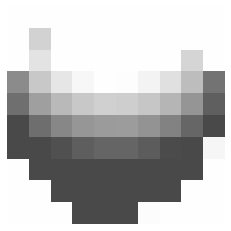

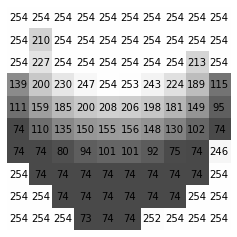

In [27]:
img_gray_10_8_1 = pixelado(img_gray1,grid_size=10)

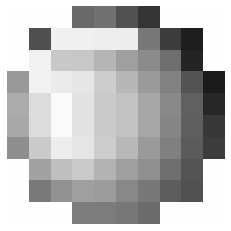

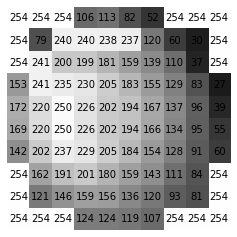

In [28]:
img_gray_10_8_2 = pixelado(img_gray2,grid_size=10)


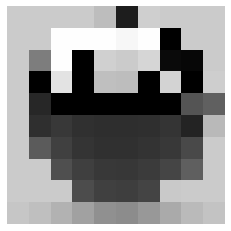

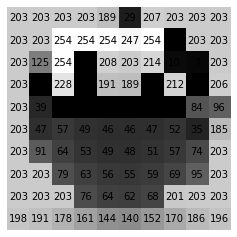

In [29]:
img_gray_10_8_3 = pixelado(img_gray3,grid_size=10)

## Cuantificación

### 10x10

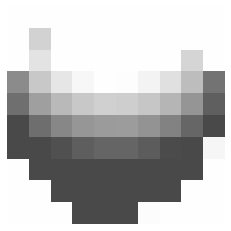

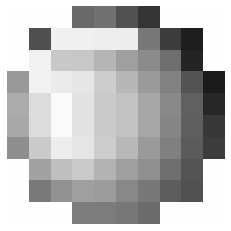

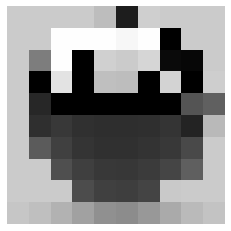

In [30]:
img_gray_10_8_1 = pixelado(img_gray1,grid_size=10,plot_values=False)
img_gray_10_8_2 = pixelado(img_gray2,grid_size=10,plot_values=False)
img_gray_10_8_3 = pixelado(img_gray3,grid_size=10,plot_values=False)

## 20x20

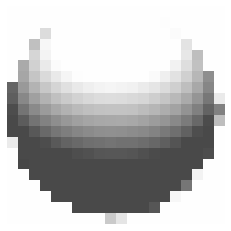

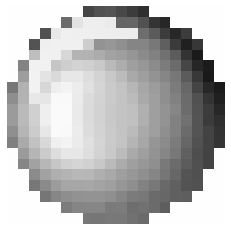

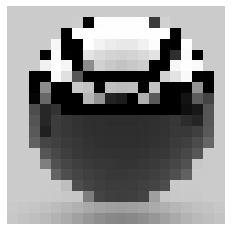

In [31]:
img_gray_10_8_1 = pixelado(img_gray1,grid_size=20,plot_values=False)
img_gray_10_8_2 = pixelado(img_gray2,grid_size=20,plot_values=False)
img_gray_10_8_3 = pixelado(img_gray3,grid_size=20,plot_values=False)

## 40x40

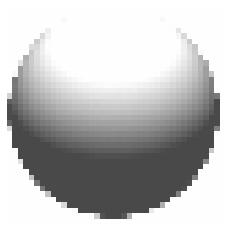

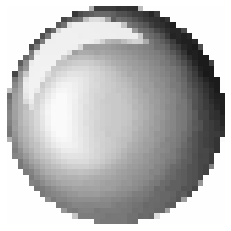

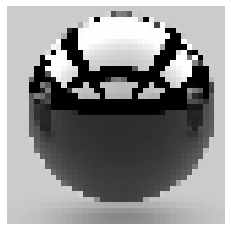

In [32]:
img_gray_10_8_1 = pixelado(img_gray1,grid_size=40,plot_values=False)
img_gray_10_8_2 = pixelado(img_gray2,grid_size=40,plot_values=False)
img_gray_10_8_3 = pixelado(img_gray3,grid_size=40,plot_values=False)

## 350x350

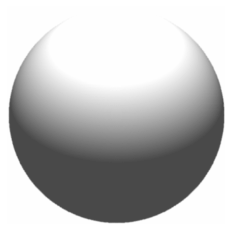

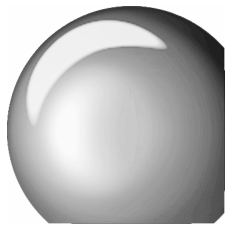

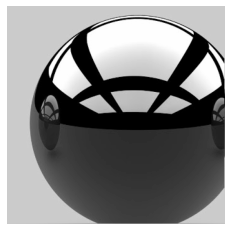

In [33]:
img_gray_10_8_1 = pixelado(img_gray1,grid_size=350,plot_values=False)
img_gray_10_8_2 = pixelado(img_gray2,grid_size=350,plot_values=False)
img_gray_10_8_3 = pixelado(img_gray3,grid_size=350,plot_values=False)